### 데이터 시각화 연습문제 (2) - 서브플롯

###### 아래의 데이터는 2020년 02월 05일부터 2023년 05월 31일까지 서울시와 전국에 대한 코로나19의 누적 확진자, 일일 확진자, 누적 사망자에 대한 조사자료 일부이다.

In [110]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

In [111]:
df = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [112]:
df.dtypes

서울시 기준일      datetime64[ns]
서울 확진자                int64
서울시 일일 확진           float64
서울시 사망                int64
전국 확진               float64
전국 일일 확진            float64
전국 사망                 int64
dtype: object

#02. 데이터 전처리
1. 검색 날짜 변수 생성

In [113]:
input_date = input("검색일을 입력하세요(yyyymmdd)")
print(type(input_date))
input_date

<class 'str'>


'20230416'

입력받은 날짜를 datetime 객체로 생성

In [123]:
start_date = dt.datetime.strptime(input_date, '%Y%m%d')
print(type(start_date))
start_date
# 날짜와 시간(datetime)을 문자열로 출력하려면 strftime
# 날짜와 시간 형식의 문자열을 datetime으로 변환하려면 strptime을 사용하면 된다.

<class 'datetime.datetime'>


datetime.datetime(2023, 4, 16, 0, 0)

2. 검색 종료일 구하기

In [115]:
delta = dt.timedelta(days=6)
#  timedelta class에선 days를 이용하여 day 정보를 뽑아낼 수 있습니다
end_date = start_date + delta
print(type(end_date))
end_date

<class 'datetime.datetime'>


datetime.datetime(2023, 4, 22, 0, 0)

3. 검색 기간에 따른 데이터 추출

In [116]:
query_df = df.query('`서울시 기준일` >= @ start_date and `서울시 기준일` <= @end_date')
# ` (억음 부호 : backtick)만 가능한 게 있는데
# " ' (따옴표)에서는 불가한 String의 사이에 개행이 된 경우 처리가 가능하다.
target_df = query_df.sort_values('서울시 기준일')
target_df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
45,2023-04-16,6030637,2604.0,6406,30989142.0,10188.0,34372
44,2023-04-17,6031694,1057.0,6407,30994088.0,4946.0,34376
43,2023-04-18,6036067,4373.0,6409,31009261.0,15173.0,34386
42,2023-04-19,6040320,4253.0,6410,31025769.0,16508.0,34392
41,2023-04-20,6044004,3684.0,6412,31039863.0,14094.0,34401
40,2023-04-21,6047486,3482.0,6412,31053459.0,13596.0,34408
39,2023-04-22,6050772,3531.0,6414,13793.0,13765.0,34413


#03. 데이터 시각화

In [117]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

2. x축 레이블 만들기

- x축 좌표

In [118]:
x = list(range(0, len(target_df['서울시 기준일'])))
x

[0, 1, 2, 3, 4, 5, 6]

- x축 텍스트

In [119]:
xticks = []

for i in range(0, len(target_df['서울시 기준일'])):
    xticks.append(target_df['서울시 기준일'].iloc[i].strftime('%m.%d'))

xticks

['04.16', '04.17', '04.18', '04.19', '04.20', '04.21', '04.22']


2. 그래프 그리기

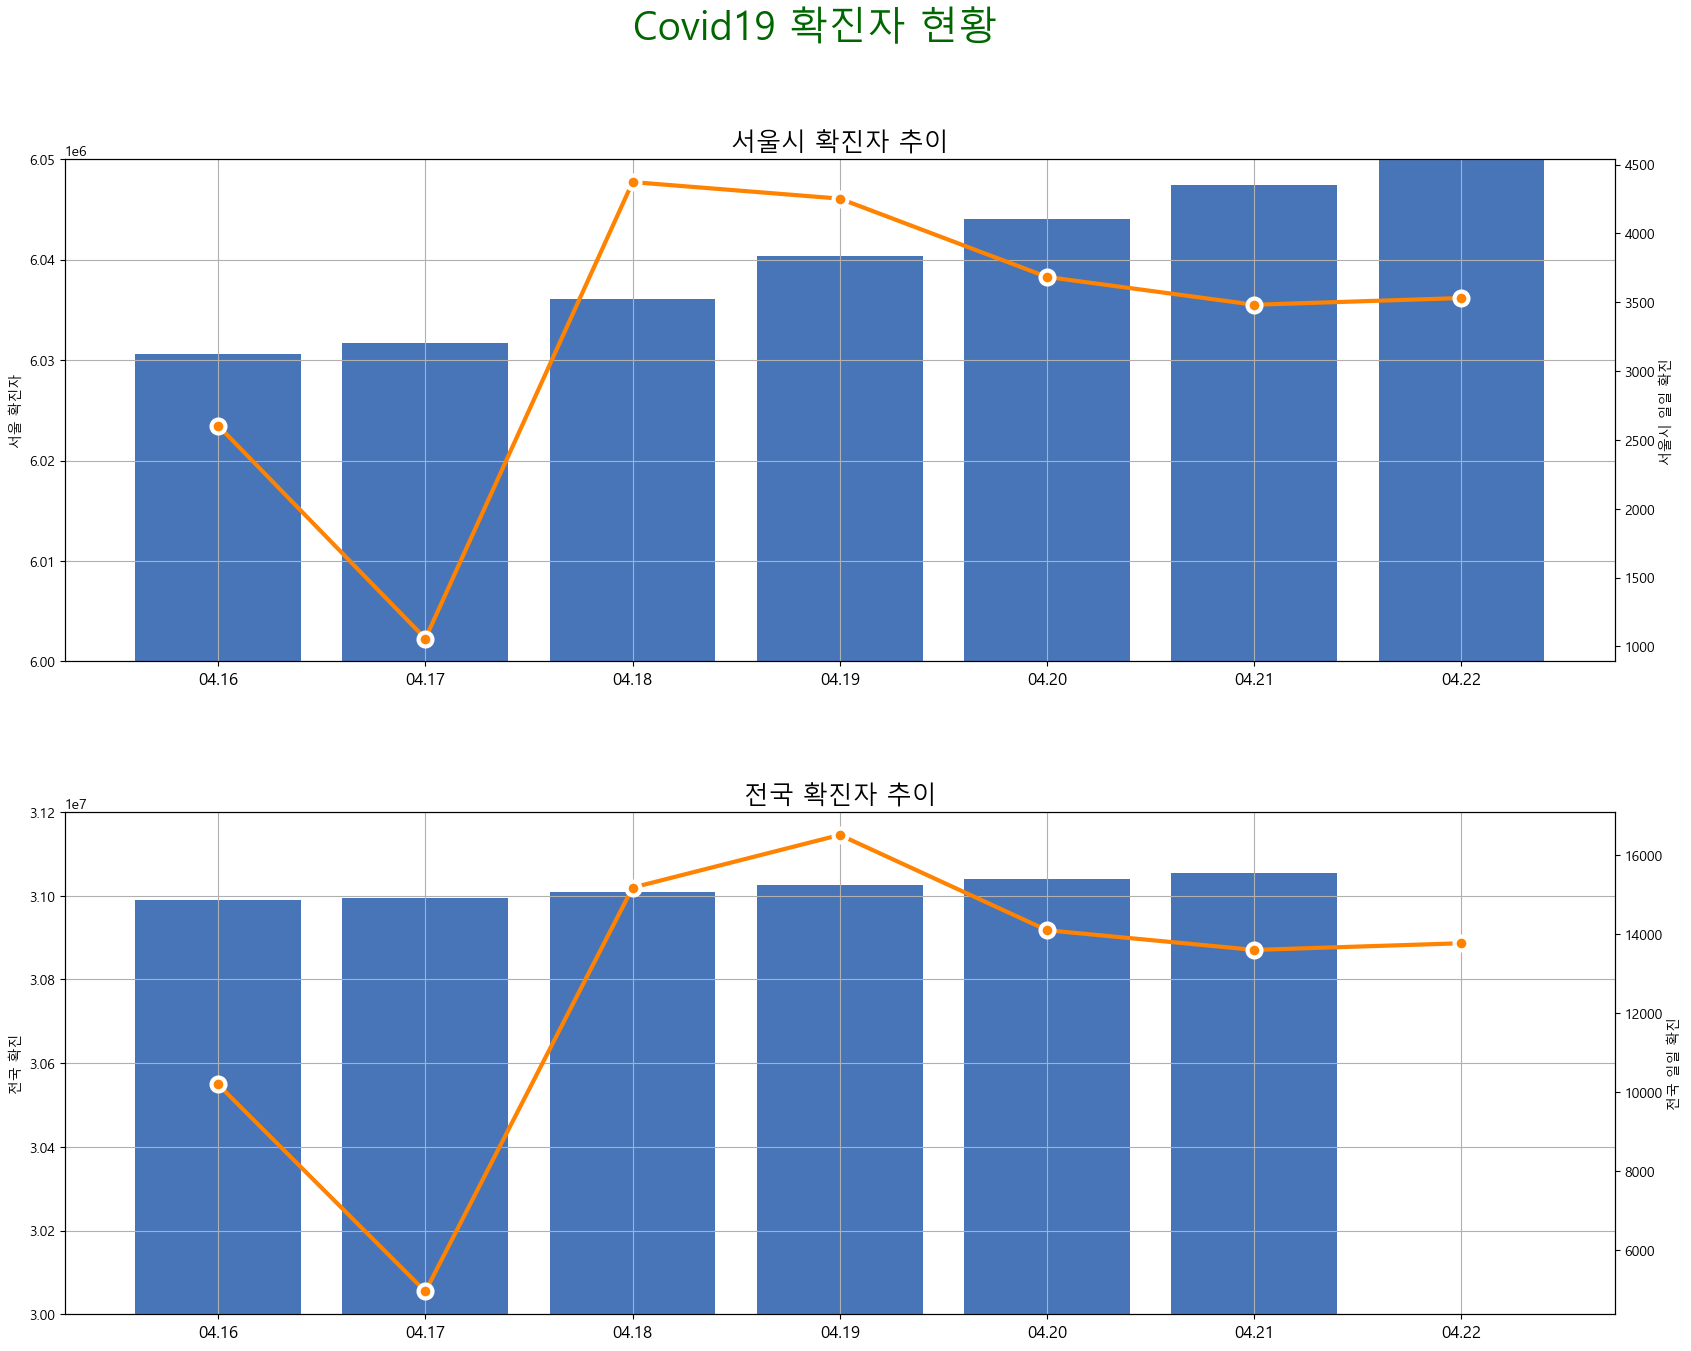

In [122]:
# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx() 

# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)


sb.barplot(data=target_df, x=x, y='서울 확진자', color="#3471CB", ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
ax1_left.set_ylim(6000000, 6050000)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

sb.lineplot(data=target_df, x=x, y='서울시 일일 확진', ax=ax1_right,
            color="#FF8200", linestyle='-', linewidth=3,
            linewidth=3 markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

sb.barplot(data=target_df, x=x, y='전국 확진', color="#3471CB", ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(30000000, 31200000)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

sb.lineplot(data=target_df, x=x, y='전국 일일 확진', ax=ax2_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

plt.show()
plt.close()